In [2]:
import numpy as np
import xarray as xr
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

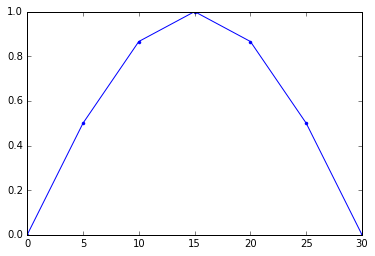

In [29]:
# define test data
x = np.arange(0, 31, 5.)
f = np.sin(np.pi* x/ x.max())
plt.plot(x, f, '.-')

In [30]:
# put into xarray dataarray
da = xr.DataArray(f, dims=['x'], coords={'x': x}, name='f')
da

<xarray.DataArray 'f' (x: 7)>
array([  0.00000000e+00,   5.00000000e-01,   8.66025404e-01,
         1.00000000e+00,   8.66025404e-01,   5.00000000e-01,
         5.66553890e-16])
Coordinates:
  * x        (x) float64 0.0 5.0 10.0 15.0 20.0 25.0 30.0

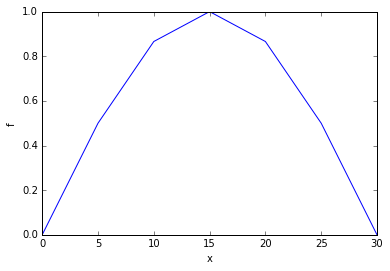

In [31]:
da.plot()

In [72]:
x_test = 11.
idx = da.indexes['x']
i_nearest = idx.get_loc(x_test, method='nearest')
x_nearest = da.x[i_nearest].values
delta_x = x_test - x_nearest
if delta_x > 0:
    i_next = i_nearest + 1
else:
    i_next = i_nearest - 1

x_next = da.x[i_next].values
w = delta_x / (x_next - x_nearest)


f_interp = (1-w)*da.isel(x=i_nearest).values + w*da.isel(x=i_next).values
da_interp = xr.DataArray(f_interp[0], dims=['x'], coords={'x': x_test})
da_interp


IndexError: invalid index to scalar variable.

In [68]:
f_interp

<xarray.DataArray 'f' ()>
array(0.8928203230275509)

In [33]:

idx

Float64Index([0.0, 5.0, 10.0, 15.0, 20.0, 25.0, 30.0], dtype='float64', name=u'x')

In [34]:
type(idx)

pandas.indexes.numeric.Float64Index

In [35]:
# there might be a better way to use the underlying index object
# http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Index.html
# for now, let's just code something that works

In [37]:
delta_x = x_test - f_nearest.x.values
delta_x

1.0

In [41]:
f_nearest.x.values + delta_x

11.0

2

TypeError: get_values() takes exactly 1 argument (2 given)